# AIFFEL 경진대회 참가 (1)
### 모션 키포인트
[대회 링크](https://dacon.io/competitions/official/235701/overview/description/)
### 일시: 210314 (일), 오후 8:30~
[베이스라인1](https://dacon.io/competitions/official/235701/codeshare/2371?dtype=recent)
### 코드 필사 day.1

***

# 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
import os
import cv2

from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, concatenate, Input, Flatten, Dense
from tensorflow.keras import Model

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 폴더 경로를 설정
os.chdir('data/1. open')

In [3]:
# 제공된 데이터들의 리스트를 확인합니다.
os.listdir()

['train_df.csv',
 'test_imgs.zip',
 'test_imgs',
 'train_imgs.zip',
 'train_imgs',
 'sample_submission.csv',
 '.~lock.train_df.csv#']

# 2. 데이터 불러오기, 살펴보기

In [4]:
train = pd.read_csv('train_df.csv')
submission = pd.read_csv('sample_submission.csv')

train

,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_palm_x,right_palm_y,spine2(back)_x,spine2(back)_y,spine1(waist)_x,spine1(waist)_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y
0,001-1-1-01-Z17_A-0000001.jpg,1046.389631,344.757881,1041.655294,329.820225,1059.429507,334.484230,1020.117796,338.890539,1048.000000,...,1067.000000,335.000000,1019.484230,455.000000,1026.515770,514.054730,998.578836,826.718013,1063.204067,838.827465
1,001-1-1-01-Z17_A-0000003.jpg,1069.850679,340.711494,1058.608552,324.593690,1075.242111,325.593690,1041.422997,331.694815,1065.593682,...,1081.187380,323.000000,1046.953248,454.062706,1058.766231,508.797029,1002.265676,699.062706,1066.376234,841.499445
2,001-1-1-01-Z17_A-0000005.jpg,1084.475902,337.000008,1078.717997,323.757889,1095.648412,325.242119,1061.039884,329.351571,1086.461032,...,1101.000000,334.000000,1044.538960,442.054730,1052.844144,495.890539,989.437847,808.757889,1066.071417,841.749554
3,001-1-1-01-Z17_A-0000007.jpg,1042.320047,361.452689,1037.907194,344.117804,1050.328382,353.913729,1016.844144,340.913737,1042.164191,...,1057.406318,372.461040,982.937294,458.109462,990.375124,507.624866,1001.305177,829.233767,1159.516499,599.389997
4,001-1-1-01-Z17_A-0000009.jpg,1058.046395,343.164191,1046.717997,331.703163,1058.132650,331.781079,1031.258806,338.593690,1049.812620,...,1069.648429,334.109461,1024.843791,453.687572,1034.391088,510.843791,998.625231,805.218921,1059.625956,839.765102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,642-2-4-31-Z148_E-0000023.jpg,637.251052,781.342260,1117.135818,370.667301,1097.123228,330.642200,1095.455539,355.657874,1083.364600,...,762.746552,862.643292,740.504148,890.141117,805.273267,541.608226,630.997090,612.486105,616.404617,803.439462
4191,642-2-4-31-Z148_E-0000025.jpg,637.251052,781.342260,1117.135818,370.667301,1097.123228,330.642200,1095.455539,355.657874,1083.364600,...,762.746552,862.643292,740.504148,890.141117,805.273267,541.608226,630.997090,612.486105,616.404617,803.439462
4192,642-2-4-31-Z148_E-0000027.jpg,637.251052,781.342260,1117.135818,370.667301,1097.123228,330.642200,1095.455539,355.657874,1083.364600,...,762.746552,862.643292,740.504148,890.141117,805.273267,541.608226,630.997090,612.486105,616.404617,803.439462
4193,642-2-4-31-Z148_E-0000029.jpg,637.251052,781.342260,1117.135818,370.667301,1097.123228,330.642200,1095.455539,355.657874,1083.364600,...,762.746552,862.643292,740.504148,890.141117,805.273267,541.608226,630.997090,612.486105,616.404617,803.439462


In [5]:
print('train의 shape는: ',train.shape)

train의 shape는:  (4195, 49)


In [6]:
# submission 파일 확인하기
submission

,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_palm_x,right_palm_y,spine2(back)_x,spine2(back)_y,spine1(waist)_x,spine1(waist)_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y
0,649-2-4-32-Z148_A-0000001.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,649-2-4-32-Z148_A-0000003.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,649-2-4-32-Z148_A-0000005.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,649-2-4-32-Z148_A-0000007.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,649-2-4-32-Z148_A-0000009.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,786-3-5-41-Z94_E-0000023.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,786-3-5-41-Z94_E-0000025.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,786-3-5-41-Z94_E-0000027.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,786-3-5-41-Z94_E-0000029.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# glob를 활용해 이미지의 경로들을 불러옵니다.
# glob 관련 설명: https://wikidocs.net/83

from glob import glob

train_paths = sorted(glob('./train_imgs/*.jpg'))
test_paths = sorted(glob('./test_imgs/*.jpg'))
print(len(train_paths), len(test_paths))

4195 1600


# 3. 시각화

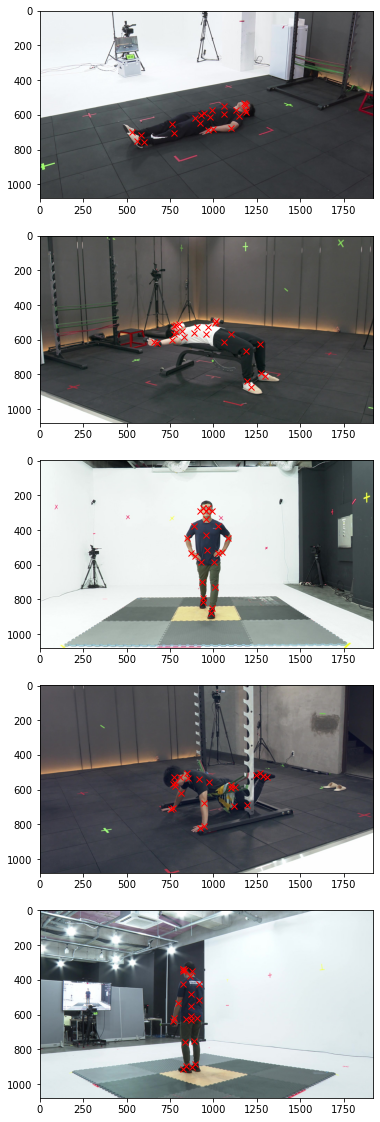

In [9]:
# 주어진 이미지와 키포인트 지점을 비교해보며 데이터에 대한 이해도 높이기

plt.figure(figsize=(40,20))
count = 1

for i in np.random.randint(0, len(train_paths), 5):
    plt.subplot(5,1,count)
    
    img_sample_path = train_paths[i]
    img = Image.open(img_sample_path)
    img_np = np.array(img)
    
    keypoint = train.iloc[:, 1:49] # 위치 키포인트 하나씩 확인
    keypoint_sample = keypoint.iloc[i,:]
    
    for j in range(0, len(keypoint.columns), 2):
        plt.plot(keypoint_sample[j], keypoint_sample[j+1], 'rx')
        plt.imshow(img_np)
        
    count+=1

# 4. 모델링

In [10]:
train['path'] = train_paths

In [11]:
train.head(5)

,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_palm_y,spine2(back)_x,spine2(back)_y,spine1(waist)_x,spine1(waist)_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y,path
0,001-1-1-01-Z17_A-0000001.jpg,1046.389631,344.757881,1041.655294,329.820225,1059.429507,334.484230,1020.117796,338.890539,1048.000000,...,335.000000,1019.484230,455.000000,1026.515770,514.054730,998.578836,826.718013,1063.204067,838.827465,./train_imgs/001-1-1-01-Z17_A-0000001.jpg
1,001-1-1-01-Z17_A-0000003.jpg,1069.850679,340.711494,1058.608552,324.593690,1075.242111,325.593690,1041.422997,331.694815,1065.593682,...,323.000000,1046.953248,454.062706,1058.766231,508.797029,1002.265676,699.062706,1066.376234,841.499445,./train_imgs/001-1-1-01-Z17_A-0000003.jpg
2,001-1-1-01-Z17_A-0000005.jpg,1084.475902,337.000008,1078.717997,323.757889,1095.648412,325.242119,1061.039884,329.351571,1086.461032,...,334.000000,1044.538960,442.054730,1052.844144,495.890539,989.437847,808.757889,1066.071417,841.749554,./train_imgs/001-1-1-01-Z17_A-0000005.jpg
3,001-1-1-01-Z17_A-0000007.jpg,1042.320047,361.452689,1037.907194,344.117804,1050.328382,353.913729,1016.844144,340.913737,1042.164191,...,372.461040,982.937294,458.109462,990.375124,507.624866,1001.305177,829.233767,1159.516499,599.389997,./train_imgs/001-1-1-01-Z17_A-0000007.jpg
4,001-1-1-01-Z17_A-0000009.jpg,1058.046395,343.164191,1046.717997,331.703163,1058.132650,331.781079,1031.258806,338.593690,1049.812620,...,334.109461,1024.843791,453.687572,1034.391088,510.843791,998.625231,805.218921,1059.625956,839.765102,./train_imgs/001-1-1-01-Z17_A-0000009.jpg


In [20]:
# 대용량 이미지를 불러올 때 Generator을 활용해 불러옵니다.

def trainGenerator():
    for i in range(len(train)):
        img = tf.io.read_file(train['path'][i]) # path 경로를 통해 이미지 읽기
        img = tf.image.decode_jpeg(img, channels=3) # 경로를 통해 불러온 이미지를 텐서로 변환
        img = tf.image.resize(img, [180, 320]) # 이미지 resize
        target = train.iloc[:, 1:49].iloc[i,:]
        
        yield (img, target)
        
# generator를 활용해 데이터셋 만들기
train_dataset = tf.data.Dataset.from_generator(trainGenerator, (tf.float32, tf.float32), (tf.TensorShape([180,320,3]),tf.TensorShape([48])))
train_dataset = train_dataset.batch(32).prefetch(1)

In [16]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [17]:
#간단한 CNN모델을 적용합니다.

model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(180,320,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(48))

In [18]:
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['accuracy'])

In [21]:
model.fit(train_dataset, epochs=10,verbose=1)

Epoch 1/10
132/132 [==============================] - 322s 2s/step - loss: 35438.1406 - accuracy: 0.1442
Epoch 2/10
132/132 [==============================] - 327s 2s/step - loss: 16296.9707 - accuracy: 0.1928
Epoch 3/10
132/132 [==============================] - 334s 3s/step - loss: 14180.4971 - accuracy: 0.2088
Epoch 4/10
132/132 [==============================] - 331s 3s/step - loss: 14883.3330 - accuracy: 0.2138
Epoch 5/10
132/132 [==============================] - 345s 3s/step - loss: 12523.3711 - accuracy: 0.2074
Epoch 6/10
132/132 [==============================] - 339s 3s/step - loss: 14732.0234 - accuracy: 0.2162
Epoch 7/10
132/132 [==============================] - 343s 3s/step - loss: 11394.6162 - accuracy: 0.2305
Epoch 8/10
132/132 [==============================] - 336s 3s/step - loss: 13588.4697 - accuracy: 0.2412
Epoch 9/10
132/132 [==============================] - 353s 3s/step - loss: 12005.8691 - accuracy: 0.2508
Epoch 10/10
132/132 [==============================] - 

# 5. test 데이터

In [22]:
X_test =[]

for test_path in tqdm(test_paths):
    img=tf.io.read_file(test_path)
    img=tf.image.decode_jpeg(img, channels=3)
    img=tf.image.resize(img, [180,320])
    
    X_test.append(img)

100%|██████████| 1600/1600 [00:10<00:00, 159.57it/s]


In [23]:
X_test=tf.stack(X_test, axis=0)
X_test.shape

TensorShape([1600, 180, 320, 3])

In [24]:
pred=model.predict(X_test)

***

# 6. 제출하기

In [25]:
submission.iloc[:, 1:]=pred
submission

,image,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_palm_x,right_palm_y,spine2(back)_x,spine2(back)_y,spine1(waist)_x,spine1(waist)_y,left_instep_x,left_instep_y,right_instep_x,right_instep_y
0,649-2-4-32-Z148_A-0000001.jpg,1242.272339,634.288513,1191.260498,639.313049,1251.066284,661.574219,1174.475586,726.211182,1277.714844,...,1265.232910,435.185760,1047.171875,684.188782,1048.423706,669.464478,797.491577,751.118225,1041.359985,706.750793
1,649-2-4-32-Z148_A-0000003.jpg,1238.186035,635.323669,1187.537354,640.101990,1247.153687,662.260132,1170.933960,727.247192,1274.024170,...,1262.209839,436.115021,1044.028442,684.649231,1045.925049,668.775391,795.421204,749.961426,1039.569458,705.263123
2,649-2-4-32-Z148_A-0000005.jpg,1240.551514,638.539917,1190.464355,647.119202,1250.089722,663.603882,1170.567627,736.146240,1270.876099,...,1270.768677,442.941162,1041.942993,683.469910,1046.216187,668.763916,792.514404,740.729065,1045.045776,695.168640
3,649-2-4-32-Z148_A-0000007.jpg,1238.710693,676.442444,1181.830811,689.915466,1238.559204,708.774231,1157.558105,773.924377,1265.209717,...,1280.200806,476.550903,1048.577881,711.956909,1047.072510,688.920410,791.018616,765.966858,1042.222046,707.860413
4,649-2-4-32-Z148_A-0000009.jpg,1217.777100,664.679016,1171.954468,675.740967,1224.674683,684.485107,1146.865723,759.253357,1245.660278,...,1259.631958,472.903564,1023.555969,702.852234,1029.461914,671.654297,782.185974,732.068848,1029.340576,685.883728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,786-3-5-41-Z94_E-0000023.jpg,845.889099,493.455475,816.031738,521.105530,832.425781,500.374939,831.386963,500.929810,866.304626,...,861.321228,386.866577,944.027649,609.456848,982.566101,691.827393,1136.602783,894.411987,1229.269897,888.626587
1596,786-3-5-41-Z94_E-0000025.jpg,923.736389,520.321167,882.885986,559.528687,896.935425,535.354248,888.763672,539.053772,922.205139,...,936.290894,422.647461,1004.886414,640.431458,1053.087524,734.437012,1233.275635,912.887329,1322.577148,883.096069
1597,786-3-5-41-Z94_E-0000027.jpg,857.537781,487.507935,826.312378,515.800415,840.976257,494.624146,836.140930,495.905579,877.109436,...,871.285278,370.865509,952.848816,607.992310,991.727234,688.370239,1144.471924,890.150696,1237.565552,879.216003
1598,786-3-5-41-Z94_E-0000029.jpg,902.864441,540.192810,869.925476,575.713684,878.197754,553.105957,870.875610,551.111206,904.294312,...,875.344604,421.511536,993.507080,646.904724,1037.977417,744.169067,1223.161865,922.279724,1311.056519,896.567078


In [26]:
submission.to_csv('baseline_submission.csv', index=False)